# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

#ReadCSV
covid_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-30-2021.csv')
covid_df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-31 03:08:59,33.93911,67.709953,70761,2919,57450.0,10392.0,Afghanistan,181.772452,4.125154
1,NaN,NaN,NaN,Albania,2021-05-31 03:08:59,41.15330,20.168300,132309,2450,129308.0,551.0,Albania,4597.574536,1.851726
2,NaN,NaN,NaN,Algeria,2021-05-31 03:08:59,28.03390,1.659600,128725,3465,89625.0,35635.0,Algeria,293.550600,2.691785
3,NaN,NaN,NaN,Andorra,2021-05-31 03:08:59,42.50630,1.521800,13693,127,13416.0,150.0,Andorra,17722.125154,0.927481
4,NaN,NaN,NaN,Angola,2021-05-31 03:08:59,-11.20270,17.873900,34366,764,27766.0,5836.0,Angola,104.563134,2.223128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,NaN,NaN,Unknown,Ukraine,2021-05-31 03:08:59,NaN,NaN,0,0,0.0,0.0,"Unknown, Ukraine",0.000000,0.000000
4010,NaN,NaN,NaN,Nauru,2021-05-31 03:08:59,-0.52280,166.931500,0,0,0.0,0.0,Nauru,0.000000,0.000000
4011,NaN,NaN,Niue,New Zealand,2021-05-31 03:08:59,-19.05440,-169.867200,0,0,0.0,0.0,"Niue, New Zealand",0.000000,0.000000
4012,NaN,NaN,NaN,Tuvalu,2021-05-31 03:08:59,-7.10950,177.649300,0,0,0.0,0.0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [2]:
covid_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-31 03:08:59,33.93911,67.709953,70761,2919,57450.0,10392.0,Afghanistan,181.772452,4.125154
1,NaN,NaN,NaN,Albania,2021-05-31 03:08:59,41.15330,20.168300,132309,2450,129308.0,551.0,Albania,4597.574536,1.851726
2,NaN,NaN,NaN,Algeria,2021-05-31 03:08:59,28.03390,1.659600,128725,3465,89625.0,35635.0,Algeria,293.550600,2.691785
3,NaN,NaN,NaN,Andorra,2021-05-31 03:08:59,42.50630,1.521800,13693,127,13416.0,150.0,Andorra,17722.125154,0.927481
4,NaN,NaN,NaN,Angola,2021-05-31 03:08:59,-11.20270,17.873900,34366,764,27766.0,5836.0,Angola,104.563134,2.223128


#### Show the information of the dataset

In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            737 non-null    float64
 10  Active               737 non-null    float64
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3970 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.2+ KB


#### Show the sum of missing values of features in the dataset

In [4]:
covid_df.isnull().sum()

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3277
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      44
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [5]:
covid_df.groupby('Country_Region')[['Confirmed']].sum()

,Confirmed
Country_Region,
Afghanistan,70761
Albania,132309
Algeria,128725
Andorra,13693
Angola,34366
...,...
West Bank and Gaza,308048
Winter Olympics 2022,0
Yemen,6737


#### Show the number of Deaths by Country

In [6]:
covid_df.groupby('Country_Region')[['Deaths']].sum()

,Deaths
Country_Region,
Afghanistan,2919
Albania,2450
Algeria,3465
Andorra,127
Angola,764
...,...
West Bank and Gaza,3495
Winter Olympics 2022,0
Yemen,1320


#### Show the number of Recovered cases by Country

In [7]:
covid_df.groupby('Country_Region')[['Recovered']].sum()

,Recovered
Country_Region,
Afghanistan,57450.0
Albania,129308.0
Algeria,89625.0
Andorra,13416.0
Angola,27766.0
...,...
West Bank and Gaza,300661.0
Winter Olympics 2022,0.0
Yemen,3427.0


#### Show the number of Active Cases by Country

In [8]:
covid_df.groupby(['Country_Region'])[['Active']].sum()

,Active
Country_Region,
Afghanistan,10392.0
Albania,551.0
Algeria,35635.0
Andorra,150.0
Angola,5836.0
...,...
West Bank and Gaza,3892.0
Winter Olympics 2022,0.0
Yemen,1990.0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [9]:
covid_df.groupby(['Country_Region'])[['Confirmed','Deaths','Recovered','Active']].sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,70761,2919,57450.0,10392.0
Albania,132309,2450,129308.0,551.0
Algeria,128725,3465,89625.0,35635.0
Andorra,13693,127,13416.0,150.0
Angola,34366,764,27766.0,5836.0
...,...,...,...,...
West Bank and Gaza,308048,3495,300661.0,3892.0
Winter Olympics 2022,0,0,0.0,0.0
Yemen,6737,1320,3427.0,1990.0


### Question 3

### Show the countries with no recovered cases

In [10]:
no_recovered=covid_df[covid_df['Recovered']==0][['Country_Region','Recovered']]
no_recovered

,Country_Region,Recovered
9,Australia,0.0
23,Belgium,0.0
24,Belgium,0.0
25,Belgium,0.0
26,Belgium,0.0
...,...,...
4009,Ukraine,0.0
4010,Nauru,0.0
4011,New Zealand,0.0
4012,Tuvalu,0.0


#### Show the countries with no confirmed cases

In [11]:
no_confirmed=covid_df[covid_df['Confirmed']==0][['Country_Region','Confirmed']]
no_confirmed

,Country_Region,Confirmed
78,Canada,0
175,Colombia,0
282,India,0
417,Mexico,0
489,Peru,0
616,Spain,0
704,US,0
716,US,0
725,US,0
748,US,0


#### Show the countries with no deaths

In [12]:
no_deaths=covid_df[covid_df['Deaths']==0][['Country_Region','Deaths']]
no_deaths

,Country_Region,Deaths
10,Australia,0
23,Belgium,0
24,Belgium,0
25,Belgium,0
26,Belgium,0
...,...,...
4009,Ukraine,0
4010,Nauru,0
4011,New Zealand,0
4012,Tuvalu,0


In [13]:
no_deaths_stat=covid_df[covid_df['Deaths']==0][['Country_Region','Confirmed','Deaths','Recovered']]
no_deaths_stat

,Country_Region,Confirmed,Deaths,Recovered
10,Australia,173,0,170.0
23,Belgium,137602,0,0.0
24,Belgium,130186,0,0.0
25,Belgium,121794,0,0.0
26,Belgium,80738,0,0.0
...,...,...,...,...
4009,Ukraine,0,0,0.0
4010,Nauru,0,0,0.0
4011,New Zealand,0,0,0.0
4012,Tuvalu,0,0,0.0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [14]:
covid_df[['Last_Update','Country_Region','Confirmed','Deaths','Recovered','Active']].sort_values(by=['Confirmed'],ascending=[False]).head(10)

,Last_Update,Country_Region,Confirmed,Deaths,Recovered,Active
269,2021-05-31 03:08:59,India,5731815,94844,5362370.0,274601.0
216,2021-05-31 03:08:59,France,5608347,108576,331911.0,5167860.0
651,2021-05-31 03:08:59,Turkey,5242911,47405,5105042.0,90464.0
3963,2021-05-31 03:08:59,United Kingdom,3913295,132984,0.0,3800904.0
6,2021-05-31 03:08:59,Argentina,3753609,77456,3319068.0,357085.0
65,2021-05-31 03:08:59,Brazil,3265930,111304,2911445.0,243181.0
287,2021-05-31 03:08:59,Iran,2902094,79939,2441528.0,380627.0
491,2021-05-31 03:08:59,Poland,2871950,73738,2638222.0,159990.0
264,2021-05-31 03:08:59,India,2587827,28679,2217117.0,342031.0
265,2021-05-31 03:08:59,India,2514279,8641,2281518.0,224120.0


#### Show the Top 10 Countries with Active cases

In [15]:
covid_df[['Last_Update','Country_Region','Confirmed','Deaths','Recovered','Active']].sort_values(by=['Active'],ascending=[False]).head(10)

,Last_Update,Country_Region,Confirmed,Deaths,Recovered,Active
216,2021-05-31 03:08:59,France,5608347,108576,331911.0,5167860.0
3963,2021-05-31 03:08:59,United Kingdom,3913295,132984,0.0,3800904.0
478,2021-05-31 03:08:59,Peru,878346,84066,0.0,794280.0
587,2021-05-31 03:08:59,Serbia,712224,6854,0.0,705370.0
611,2021-05-31 03:08:59,Spain,714616,15285,40736.0,658595.0
394,2021-05-31 03:08:59,Mexico,658113,33200,0.0,624913.0
606,2021-05-31 03:08:59,Spain,611008,14531,26203.0,570274.0
597,2021-05-31 03:08:59,Spain,581880,9880,10671.0,561329.0
591,2021-05-31 03:08:59,Slovakia,770851,12339,255300.0,503212.0
446,2021-05-31 03:08:59,Netherlands,394601,4268,0.0,388008.0


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Country-wise Deaths, Confirmed, Recovered and Active Casaes where Total Deaths is more than 50,000')

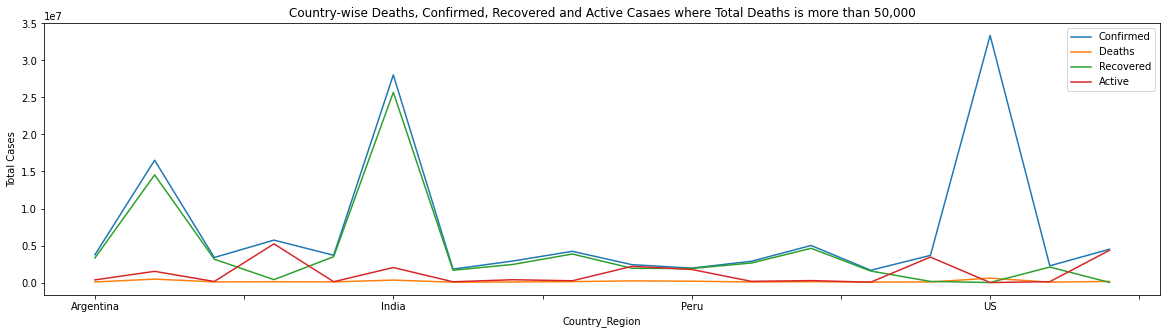

In [39]:
countrywise=covid_df.groupby("Country_Region")[['Confirmed','Deaths','Recovered','Active']].sum()
countrywise=countrywise[countrywise['Deaths']>50000]
countrywise.plot(kind='line',figsize=(20,5))
plt.ylabel("Total Cases")
plt.title("Country-Wise Deaths, Confirmed, Recovered and Active Casaes where Total Deaths is more than 50,000")

### Question 6

### Plot Province/State wise Deaths in USA

In [48]:
import plotly.express as px

In [49]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-30-2021.csv')

In [50]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [63]:
us_data = covid_data[covid_data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
us_data = us_data.groupby(['Province_State'])['Deaths'].sum().nlargest(10).reset_index()
us_data_death = us_data[us_data['Deaths'] > 0]
state_fig = px.bar(us_data_death, x='Province_State', y='Deaths', title='Province/State wise Deaths reported of COVID-19 in USA', text='Deaths')
state_fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [64]:
us_data=covid_data.groupby(["Province_State"],as_index=False)[['Province_State','Active']].sum()
#provincewise
fig=px.bar(us_data,x="Province_State",y="Active",title="Province/State Wise Active Cases reported in USA")
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [65]:
us_data2 = covid_data[covid_data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
us_data2 = us_data2.groupby(['Province_State'])['Confirmed'].sum().nlargest(10).reset_index()
us_data_death2 = us_data2[us_data2['Confirmed'] > 0]
state_fig2 = px.bar(us_data_death2, x='Province_State', y='Confirmed', title='Province/ State wise Confirmed Cases of COVID-19 reported in USA', text='Confirmed')
state_fig2.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [66]:
covid_worldwide= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid_worldwide

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/23,1/14/23,1/15/23,1/16/23,1/17/23,1/18/23,1/19/23,1/20/23,1/21/23,1/22/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207900,207900,207900,207993,208009,208034,208062,208084,208084,208084
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334018,334029,334037,334037,334064,334084,334084,334084,334097,334101
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271286,271287,271287,271287,271292,271296,271307,271316,271328,271335
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47781,47781,47781,47781,47781,47781,47820,47820,47820,47820
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,336955,336955,337303,337303,337780,338090,338407,338656,338986,338986


In [68]:
covid_data_world= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid_data_world.columns
covid_data_world=covid_data_world.groupby('Country/Region').sum()
covid_data_world= covid_data_world.reset_index()
covid_data_world=covid_data_world.sort_values(by='6/22/21',ascending= False)
covid_data_world=covid_data_world.head(50)
figure =px.bar(covid_data_world , x='Country/Region',y=['6/22/21', '6/23/21',
       '6/24/21', '6/25/21', '6/26/21', '6/27/21',
       '6/13/22', '6/14/22', '6/15/22', '6/16/22', '6/17/22', '6/18/22',
       '6/19/22', '6/20/22', '6/21/22', '6/22/22'],title='Worldwide Confirmed Cases over time',text_auto = True)
figure.show()